In [1]:
import pandas as pd
from datetime import *
from pymongo import MongoClient

client = MongoClient('localhost', 27017)

In [2]:
def extraer(fecha_inicial,fecha_final):
    tweets = client['Tweets'].tweets.find({
    'Date': {
        '$gte': fecha_inicial, 
        '$lt': fecha_final
    }
})
    semana = pd.DataFrame(list(tweets))
    semana = semana[['Date','Text']]
    return semana

In [3]:
fecha_inicial = datetime.strptime('01/07/2019', '%d/%m/%Y')
fecha_final = datetime.strptime('08/07/2019', '%d/%m/%Y')
Semana = 1
Semanas = {}
for i in range(27):     
    #print(Semana,fecha_inicial, fecha_final)
    Semanas.update({Semana: [fecha_inicial,fecha_final]})
    fecha_inicial = fecha_final
    fecha_final = fecha_final + timedelta(7)
    Semana += 1

In [4]:
for i in range(28):
    pass
    #print("Semana"+str(i)+" = extraer(Semanas["+str(i)+"][0],Semanas["+str(i)+"][1])")

In [5]:
Semana1 = extraer(Semanas[1][0],Semanas[1][1])
Semana2 = extraer(Semanas[2][0],Semanas[2][1])
Semana3 = extraer(Semanas[3][0],Semanas[3][1])
Semana4 = extraer(Semanas[4][0],Semanas[4][1])
Semana5 = extraer(Semanas[5][0],Semanas[5][1])
Semana6 = extraer(Semanas[6][0],Semanas[6][1])
Semana7 = extraer(Semanas[7][0],Semanas[7][1])
Semana8 = extraer(Semanas[8][0],Semanas[8][1])
Semana9 = extraer(Semanas[9][0],Semanas[9][1])
Semana10 = extraer(Semanas[10][0],Semanas[10][1])
Semana11 = extraer(Semanas[11][0],Semanas[11][1])
Semana12 = extraer(Semanas[12][0],Semanas[12][1])
Semana13 = extraer(Semanas[13][0],Semanas[13][1])
Semana14 = extraer(Semanas[14][0],Semanas[14][1])
Semana15 = extraer(Semanas[15][0],Semanas[15][1])
Semana16 = extraer(Semanas[16][0],Semanas[16][1])
Semana17 = extraer(Semanas[17][0],Semanas[17][1])
Semana18 = extraer(Semanas[18][0],Semanas[18][1])
Semana19 = extraer(Semanas[19][0],Semanas[19][1])
Semana20 = extraer(Semanas[20][0],Semanas[20][1])
Semana21 = extraer(Semanas[21][0],Semanas[21][1])
Semana22 = extraer(Semanas[22][0],Semanas[22][1])
Semana23 = extraer(Semanas[23][0],Semanas[23][1])
Semana24 = extraer(Semanas[24][0],Semanas[24][1])
Semana25 = extraer(Semanas[25][0],Semanas[25][1])
Semana26 = extraer(Semanas[26][0],Semanas[26][1])
Semana27 = extraer(Semanas[27][0],Semanas[27][1])

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [10]:
politico = ['presidente', 'gobernador', 'debate', 'político', 'elecciones', 'trump', 'demócratas']
social = ['sexual','inmigrantes', 'migrantes', 'redadas', 'armas', 'crisis', 'protestas', 'lebarón', 
          'Problema-Social', 'epstein', 'inProblema-Social', 'tiroteo', 'paro']
naturaleza = ['incendios', 'huracán', 'tormenta', 'naturaleza','terremoto']
cultura = ['eclipse', 'final', 'copa', 'luna', 'joker', 'wars', 'cultura', 'josé', 'navidad', 'película']
narcotrafico = ['chapo', 'farc', 'narcotrafico']
todos = politico+social+naturaleza+cultura+narcotrafico

Palabras_Vacias = ['años', 'https', 'julio', 'día', 'mira', 'ver', 'cómo', 'después', 'hoy', 'hace', 
                   'ser', 'saber', 'dijo', 'así', 'dice', 'aquí', 'tras', 'según', 'puede', 'gran', 
                   'ahora', 'debes', 'contamos', 'acuerdo', 'hacer', 'parte', 'paso', 'rico', 'año', 
                   'dos', 'si', 'unidos', 'puerto', 'país', 'mundo', 'personas', 'hora', 'minuto', 
                   'nueva', 'historia', 'familia', 'década', 'semana','solar', 'países', 'vez', 'menos',
                   'últimos', 'kong','sido' , 'florida', 'vida', 'venezuela', 'américa', 'total', 
                   'venezuela', 'millones', 'tiroteos', 'ciudad', 'perú', 'bolivia', 'chile', 'españa', 
                   'nuevo', 'méxico','final', 'brasil', 'china', 'video', 'domingo', 'hombre', 'podría', 
                   'rusia', 'the', 'argentina', 'ecuador','accidente', 'llamada', 'latina', 'evo',
                   'ataque', 'muerte', 'colombia', 'morales', 'moreno', 'lenín', 'miami', 'solo', 'renuncia', 
                   'primer', 'dorian', 'presidente', 'gobierno', 'nobel', 'español', 'latina', 'avión', 'star', 
                   'donald', 'california', 'caso', 'ice', 'guzmán', 'gobernador', 'rosselló', 'Rico', 
                   'texas', 'tan', 'hong', 'amazonas', 'greta', 'correa', 'cnn', 'vivo', 'hijo', 'piñera', 
                   'huracanes', 'septiembre', 'hablasespañol', 'primera', 'mejor', 'entrevista', 'latina', 'japón', 
                   'mujer', 'imágenes', 'irán', 'días', 'saber', 'tres', 'área', 'hice', 'cosas', 'york', 
                   'casa', 'juicio']

In [11]:
def palabras_claves(TweetsSemanales):
    entretenimiento = ['eclipse','mundial']
    TweetsSemanales.drop_duplicates(['Text'], keep='last')
    TweetsSemanales = TweetsSemanales.drop(TweetsSemanales[pd.isnull(TweetsSemanales['Text'])].index)
    texto = TweetsSemanales['Text'].tolist()
    texto = " ".join(texto)
    
    tokens = word_tokenize(texto,"spanish")
    tokens = [word.lower() for word in tokens if word.isalpha()] # Remover los signos de puntuación
    
    clean_tokens = tokens[:]
    for token in tokens:
        if token in stopwords.words('spanish'):
            clean_tokens.remove(token)
            
    for token in clean_tokens:
        if token in Palabras_Vacias:
            clean_tokens.remove(token)
            
    for token in clean_tokens:        
        if token in politico:
            clean_tokens = [w.replace(token,"político") for w in clean_tokens]
        elif token in social:
            clean_tokens = [w.replace(token,"Problema-Social") for w in clean_tokens]
        elif token in cultura:
            clean_tokens = [w.replace(token,"cultura") for w in clean_tokens]
        elif token in naturaleza:
            clean_tokens = [w.replace(token,"naturaleza") for w in clean_tokens]
        elif token in narcotrafico:
            clean_tokens = [w.replace(token,"narcotrafico") for w in clean_tokens]

    
    #for i in range(len(clean_tokens)):
    #    if clean_tokens[i] in social:
    #    clean_tokens = [w.replace(clean_tokens[i],"entretenimiento") for w in clean_tokens]
    
    freq_clean_sin_lem = nltk.FreqDist(clean_tokens)   
    
    return freq_clean_sin_lem.most_common(10)

In [12]:
for i in range(28):
    pass
    #print("claves"+str(i)+" = palabras_claves(Semana"+str(i)+")")

In [13]:
claves1 = palabras_claves(Semana1)
claves2 = palabras_claves(Semana2)
claves3 = palabras_claves(Semana3)
claves4 = palabras_claves(Semana4)
claves5 = palabras_claves(Semana5)
claves6 = palabras_claves(Semana6)
claves7 = palabras_claves(Semana7)
claves8 = palabras_claves(Semana8)
claves9 = palabras_claves(Semana9)
claves10 = palabras_claves(Semana10)
claves11 = palabras_claves(Semana11)
claves12 = palabras_claves(Semana12)
claves13 = palabras_claves(Semana13)
claves14 = palabras_claves(Semana14)
claves15 = palabras_claves(Semana15)
claves16 = palabras_claves(Semana16)
claves17 = palabras_claves(Semana17)
claves18 = palabras_claves(Semana18)
claves19 = palabras_claves(Semana19)
claves20 = palabras_claves(Semana20)
claves21 = palabras_claves(Semana21)
claves22 = palabras_claves(Semana22)
claves23 = palabras_claves(Semana23)
claves24 = palabras_claves(Semana24)
claves25 = palabras_claves(Semana25)
claves26 = palabras_claves(Semana26)
claves27 = palabras_claves(Semana27)

In [14]:
claves1

[('cultura', 278),
 ('político', 158),
 ('Problema-Social', 114),
 ('años', 62),
 ('inProblema-Social', 59),
 ('mundial', 49),
 ('naturaleza', 49),
 ('total', 49),
 ('independencia', 46),
 ('bajo', 42)]

In [15]:
Claves_T = [claves1, claves2, claves3, claves4, claves5, claves6, claves7, claves8, claves9, claves10,
           claves11, claves12, claves13, claves14, claves15, claves16, claves17, claves18, claves19, claves20,
           claves21, claves22, claves23, claves24, claves25, claves26, claves27]

In [16]:
fecha_inicial = datetime.strptime('01/07/2019', '%d/%m/%Y')
fecha_final = datetime.strptime('08/07/2019', '%d/%m/%Y')
Sem = 1
Total = {}
for i in range(27):     
    Total.update({"Semana "+str(i+1)+"": [fecha_inicial,fecha_final,Claves_T[i]]})
    fecha_inicial = fecha_final
    fecha_final = fecha_final + timedelta(7)
    Sem += 1

In [17]:
df = pd.DataFrame([key for key in Total.keys()], columns=['Semana'])

In [18]:
f_ini = []
f_fin = []
for i in range(1,28):
    f_ini.append(Total['Semana '+str(i)+""][0])
    f_fin.append(Total['Semana '+str(i)+""][1])
    
df['Fecha Inicio'] = f_ini
df['Fecha Fin'] = f_fin

In [19]:
clavs1 = []
clavs2 = []
clavs3 = []
clavs4 = []
clavs5 = []
for i in range(27):
    clavs1.append(i)
    clavs2.append(i)
    clavs3.append(i)
    clavs4.append(i)
    clavs5.append(i)

In [20]:
for i in range(27):
    for j in range(5):
        if Total['Semana '+str(i+1)+""][2][j][0] == 'político':
            clavs1[i] = Total['Semana '+str(i+1)+""][2][j][1]       
        if Total['Semana '+str(i+1)+""][2][j][0] == 'cultura':
                clavs2[i] = Total['Semana '+str(i+1)+""][2][j][1]
        if Total['Semana '+str(i+1)+""][2][j][0] == 'Problema-Social':
                clavs3[i] = Total['Semana '+str(i+1)+""][2][j][1]           
        if Total['Semana '+str(i+1)+""][2][j][0] == 'naturaleza':
                clavs4[i] = Total['Semana '+str(i+1)+""][2][j][1]
        if Total['Semana '+str(i+1)+""][2][j][0] == 'narcotrafico':
                clavs5[i] = Total['Semana '+str(i+1)+""][2][j][1]

In [21]:
for i in range(27):
    if clavs1[i] <= 26:
        clavs1[i] = 0

In [22]:
for i in range(27):
    if clavs2[i] <= 26:
        clavs2[i] = 0
for i in range(27):
    if clavs3[i] <= 26:
        clavs3[i] = 0
for i in range(27):
    if clavs4[i] <= 26:
        clavs4[i] = 0
for i in range(27):
    if clavs5[i] <= 26:
        clavs5[i] = 0

In [23]:
claves2

[('Problema-Social', 235),
 ('político', 171),
 ('naturaleza', 89),
 ('cultura', 60),
 ('https', 58),
 ('política', 50),
 ('años', 50),
 ('momento', 38),
 ('padre', 38),
 ('trabajo', 37)]

In [24]:
df['Politica'] = clavs1
df['Cultura'] = clavs2
df['Problema-Social'] = clavs3
df['Naturalez'] = clavs4
df['Narcotrafico'] = clavs5

In [25]:
Div = pd.read_csv("EUR-USD Jul-Dic2019.csv", sep = ",")
Div['Date'] = pd.to_datetime(Div['Date'])
Div.index = Div['Date']

In [26]:
Div = Div.resample("W").mean()

In [27]:
df['Price EUR-USD'] = Div['Price'].tolist()

In [45]:
df = df[['Semana','Fecha Inicio', 'Fecha Fin', 'Politica', 'Cultura','Problema-Social', 'Price EUR-USD']]

In [46]:
df.to_csv("PruebaF21.csv")

In [48]:
df

,Semana,Fecha Inicio,Fecha Fin,Politica,Cultura,Problema-Social,Price EUR-USD
0,Semana 1,2019-07-01,2019-07-08,158,278,114,1.12718
1,Semana 2,2019-07-08,2019-07-15,171,60,235,1.12398
2,Semana 3,2019-07-15,2019-07-22,194,178,130,1.12384
3,Semana 4,2019-07-22,2019-07-29,203,71,193,1.11556
4,Semana 5,2019-07-29,2019-08-05,278,0,213,1.11138
5,Semana 6,2019-08-05,2019-08-12,221,0,408,1.11962
6,Semana 7,2019-08-12,2019-08-19,166,0,279,1.11442
7,Semana 8,2019-08-19,2019-08-26,147,0,169,1.10972
8,Semana 9,2019-08-26,2019-09-02,97,0,119,1.10638
9,Semana 10,2019-09-02,2019-09-09,96,70,132,1.10082


In [47]:
df.corr(method='pearson')

,Politica,Cultura,Problema-Social,Price EUR-USD
Politica,1.000000,0.003216,0.342294,0.026974
Cultura,0.003216,1.000000,-0.165272,0.124025
Problema-Social,0.342294,-0.165272,1.000000,0.209635
Price EUR-USD,0.026974,0.124025,0.209635,1.000000


In [49]:
import matplotlib.pyplot as plt

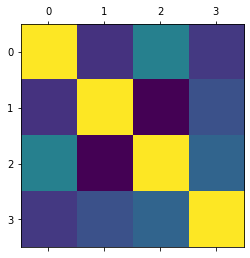

In [50]:
plt.matshow(df.corr())

Text(0.5, 0, 'Politica')

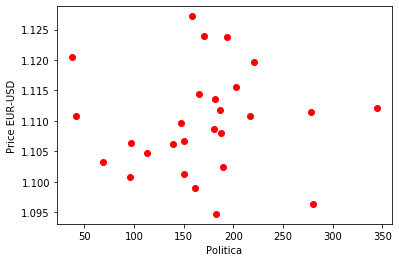

In [35]:
plt.plot(df['Politica'], df['Price EUR-USD'], 'ro')
plt.ylabel('Price EUR-USD')
plt.xlabel('Politica')

Text(0.5, 0, 'Cultura')

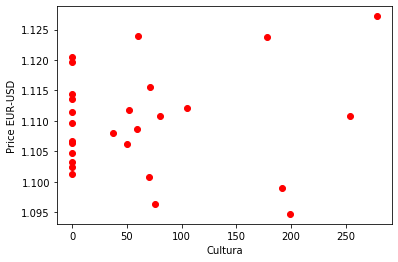

In [36]:
plt.plot(df['Cultura'], df['Price EUR-USD'], 'ro')
plt.ylabel('Price EUR-USD')
plt.xlabel('Cultura')

Text(0.5, 0, 'Problema-Social')

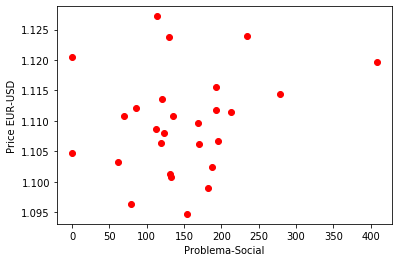

In [37]:
plt.plot(df['Problema-Social'], df['Price EUR-USD'], 'ro')
plt.ylabel('Price EUR-USD')
plt.xlabel('Problema-Social')

In [215]:
Semana18= Semana18.drop(Semana18[pd.isnull(Semana18['Text'])].index)

In [216]:
Semana18.drop_duplicates(['Text'], keep='last')

,Date,Text
1,2019-10-28 00:10:03,Regístrate aquí para recibir nuestro boletín d...
2,2019-10-28 00:10:33,ATENCIÓN #ArgentinaVoto2019 Los primeros resul...
3,2019-10-28 00:21:17,Claudia López no solo es la primera mujer que ...
4,2019-10-28 00:24:50,Elecciones en Argentina: Fernández lidera las ...
5,2019-10-28 00:30:09,El hombre gana un premio de lotería de US$200....
...,...,...
1909,2019-11-03 23:34:29,¿Qué es el síndrome Ehlers-Danlos? Te lo expli...
1910,2019-11-03 23:35:02,Los mitos sobre las diferencias en el cerebro ...
1911,2019-11-03 23:46:03,Un monje de hace 400 años que sigue rezando; u...
1912,2019-11-03 23:55:06,"Steve Easterbrook, quien fue nombrado CEO en 2..."


In [220]:
analisis1 = Semana18[Semana18['Text'].str.contains('Fernández')]

In [221]:
analisis1['Text'].tolist()

['ATENCIÓN #ArgentinaVoto2019 Los primeros resultados dan como ganador a Alberto Fernández con una diferencia menor de la anticipada, pero que le darían el triunfo en primera vuelta a Fernández. https://cnn.it/2MS7gO1',
 'Elecciones en Argentina: Fernández lidera las elecciones en Argentina y se impone en primera vuelta a la fórmula de Macri',
 'ÚLTIMA HORA Alberto Fernández, virtual ganador la elección presidencial en Argentina en primera vuelta https://cnn.it/2NgMjvp',
 'Fernández, virtual ganador',
 'Macri felicitó a Fernández y lo invitó a desayunar https://cnn.it/364I9zj ¿Qué opinas del gesto y del discurso del actual mandatario tras la derrota?',
 '"Vamos a construir la Argentina igualitaria y solidaria que todos soñamos", dijo Alberto Fernández tras el triunfo de las elecciones presidenciales en Argentina.',
 'Fernández: "Vamos a ser la Argentina que merecemos ser".',
 'La fórmula peronista Alberto Fernández-Cristina Kirchner se impone en primera vuelta en las elecciones preside

In [240]:
analisis1.to_csv("A2.csv")

In [34]:
df['Price EUR-USD'].min()

1.0947

In [35]:
df['Price EUR-USD'].max()

1.12718